# Clusterização kmeans
k-means
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans.html#scipy.cluster.vq.kmeans

In [1]:
# Desativar avisos de expiração
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
import scipy
import seaborn as sns
import numpy as np
from scipy.cluster.vq import vq, kmeans, whiten
import matplotlib.pyplot as plt

In [4]:
#
features  = np.array([[ 1.9,2.3],

                      [ 1.5,2.5],

                      [ 0.8,0.6],

                      [ 0.4,1.8],

                      [ 0.1,0.1],

                      [ 0.2,1.8],

                      [ 2.0,0.5],

                      [ 0.3,1.5],

                      [ 1.0,1.0]])

whitened = whiten(features)

book = np.array((whitened[0],whitened[2]))

kmeans(whitened,book)

(array([[2.45121811, 3.03653641],
        [0.98872663, 1.31944737]]),
 0.9088234961964715)

In [5]:
features

array([[1.9, 2.3],
       [1.5, 2.5],
       [0.8, 0.6],
       [0.4, 1.8],
       [0.1, 0.1],
       [0.2, 1.8],
       [2. , 0.5],
       [0.3, 1.5],
       [1. , 1. ]])

In [6]:
whitened

array([[2.73959671, 2.91001406],
       [2.16283951, 3.16305876],
       [1.15351441, 0.7591341 ],
       [0.5767572 , 2.27740231],
       [0.1441893 , 0.12652235],
       [0.2883786 , 2.27740231],
       [2.88378601, 0.63261175],
       [0.4325679 , 1.89783526],
       [1.44189301, 1.2652235 ]])

In [7]:
book

array([[2.73959671, 2.91001406],
       [1.15351441, 0.7591341 ]])

In [8]:
kmeans

<function scipy.cluster.vq.kmeans(obs, k_or_guess, iter=20, thresh=1e-05, check_finite=True, *, seed=None)>

In [11]:
# Testando com 3 grupgos
codes = 3

kmeans(whitened,codes)

(array([[2.45121811, 3.03653641],
        [0.4325679 , 2.15087996],
        [1.40584568, 0.69587293]]),
 0.5511808116483707)

In [10]:
# Testando com 6 Grupos
codes = 6

kmeans(whitened,codes)

(array([[2.16283951, 3.16305876],
        [2.73959671, 2.91001406],
        [0.1441893 , 0.12652235],
        [1.29770371, 1.0121788 ],
        [0.4325679 , 2.15087996],
        [2.88378601, 0.63261175]]),
 0.13546534751851866)

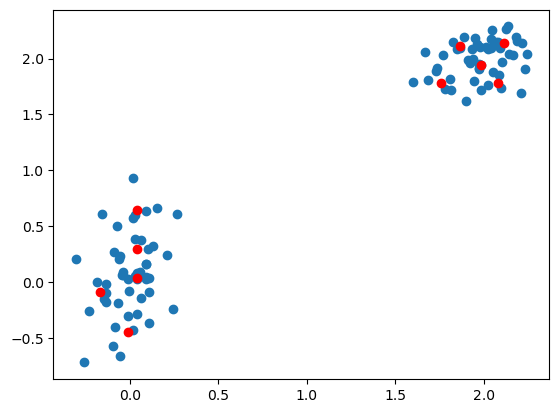

In [12]:
# Create 50 datapoints in two clusters a and b

pts = 50

rng = np.random.default_rng()

a = rng.multivariate_normal([0, 0], [[4, 1], [1, 4]], size=pts)

b = rng.multivariate_normal([30, 10],

                            [[10, 2], [2, 1]],

                            size=pts)

features = np.concatenate((a, b))

# Whiten data

whitened = whiten(features)

# Find 2 clusters in the data

codebook, distortion = kmeans(whitened, 10)

# Plot whitened data and cluster centers in red

plt.scatter(whitened[:, 0], whitened[:, 1])

plt.scatter(codebook[:, 0], codebook[:, 1], c='r')

plt.show()

# Testando kmeans2 - Multivariado
https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.vq.kmeans2.html

In [14]:
from scipy.cluster.vq import kmeans2
import matplotlib.pyplot as plt
import numpy as np

In [15]:
rng = np.random.default_rng()

a = rng.multivariate_normal([0, 6], [[2, 1], [1, 1.5]], size=45)

b = rng.multivariate_normal([2, 0], [[1, -1], [-1, 3]], size=30)

c = rng.multivariate_normal([6, 4], [[5, 0], [0, 1.2]], size=25)

z = np.concatenate((a, b, c))

rng.shuffle(z)

In [16]:
a.mean()

3.302994308123389

In [17]:
b.mean()

0.9307401691445509

In [18]:
c.mean()

5.324083670666473

In [19]:
rng

Generator(PCG64) at 0x18FC5B6B300

In [20]:
centroid, label = kmeans2(z, 3, minit='points')

centroid

array([[ 6.74496813,  4.3677983 ],
       [ 2.08273807, -0.09056115],
       [ 0.30876523,  6.25573409]])

In [21]:
counts = np.bincount(label)

counts

array([23, 31, 46], dtype=int64)

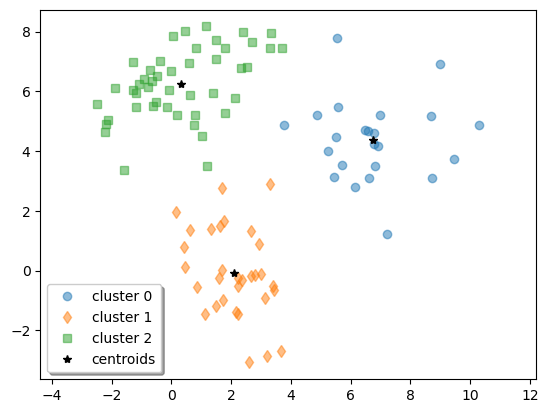

In [22]:
w0 = z[label == 0]

w1 = z[label == 1]

w2 = z[label == 2]

plt.plot(w0[:, 0], w0[:, 1], 'o', alpha=0.5, label='cluster 0')

plt.plot(w1[:, 0], w1[:, 1], 'd', alpha=0.5, label='cluster 1')

plt.plot(w2[:, 0], w2[:, 1], 's', alpha=0.5, label='cluster 2')

plt.plot(centroid[:, 0], centroid[:, 1], 'k*', label='centroids')

plt.axis('equal')

plt.legend(shadow=True)

plt.show()

# Exemplo com Pandas
https://datatofish.com/k-means-clustering-python/

In [23]:
import pandas as pd

data = {
    'x': [25, 34, 22, 27, 33, 33, 31, 22, 35, 34, 67, 54, 57, 43, 50, 57, 59, 52, 65, 47, 49, 48, 35, 33, 44, 45, 38,
          43, 51, 46],
    'y': [79, 51, 53, 78, 59, 74, 73, 57, 69, 75, 51, 32, 40, 47, 53, 36, 35, 58, 59, 50, 25, 20, 14, 12, 20, 5, 29, 27,
          8, 7]
    }

df = pd.DataFrame(data)
df.head(3)


,x,y
0,25,79
1,34,51
2,22,53


C:\Users\fallg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[43.2 16.7]
 [29.6 66.8]
 [55.1 46.1]]


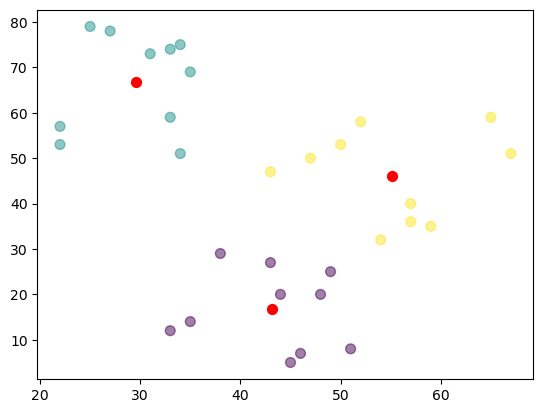

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = {
    'x': [25, 34, 22, 27, 33, 33, 31, 22, 35, 34, 67, 54, 57, 43, 50, 57, 59, 52, 65, 47, 49, 48, 35, 33, 44, 45, 38,
          43, 51, 46],
    'y': [79, 51, 53, 78, 59, 74, 73, 57, 69, 75, 51, 32, 40, 47, 53, 36, 35, 58, 59, 50, 25, 20, 14, 12, 20, 5, 29, 27,
          8, 7]
    }

df = pd.DataFrame(data)

kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [35]:
# Cria uma coluna de Clusters recebendo os labels do kmeans
df['cluster'] = kmeans.labels_
df.head()

,x,y,cluster
0,25,79,1
1,34,51,1
2,22,53,1
3,27,78,1
4,33,59,1


In [37]:
df.groupby('cluster').describe().T

cluster          0          1          2
x count  10.000000  10.000000  10.000000
  mean   43.200000  29.600000  55.100000
  std     6.033241   5.125102   7.534366
  min    33.000000  22.000000  43.000000
  25%    39.250000  25.500000  50.500000
  50%    44.500000  32.000000  55.500000
  75%    47.500000  33.750000  58.500000
  max    51.000000  35.000000  67.000000
y count  10.000000  10.000000  10.000000
  mean   16.700000  66.800000  46.100000
  std     8.718435  10.716550   9.757618
  min     5.000000  51.000000  32.000000
  25%     9.000000  57.500000  37.000000
  50%    17.000000  71.000000  48.500000
  75%    23.750000  74.750000  52.500000
  max    29.000000  79.000000  59.000000

C:\Users\fallg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[[43.2        16.7       ]
 [27.75       55.        ]
 [55.1        46.1       ]
 [30.83333333 74.66666667]]


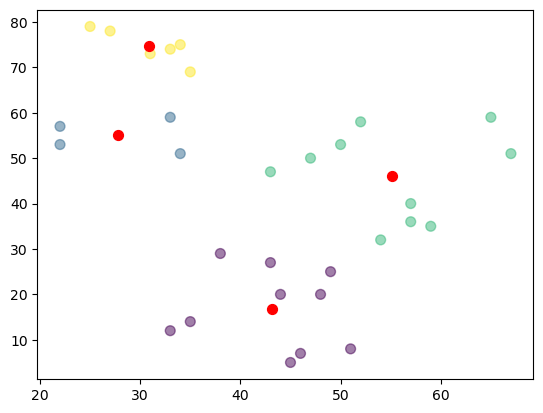

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = {
    'x': [25, 34, 22, 27, 33, 33, 31, 22, 35, 34, 67, 54, 57, 43, 50, 57, 59, 52, 65, 47, 49, 48, 35, 33, 44, 45, 38,
          43, 51, 46],
    'y': [79, 51, 53, 78, 59, 74, 73, 57, 69, 75, 51, 32, 40, 47, 53, 36, 35, 58, 59, 50, 25, 20, 14, 12, 20, 5, 29, 27,
          8, 7]
    }

df = pd.DataFrame(data)

kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


In [39]:
kmeans

KMeans(n_clusters=4)

In [40]:
centroids

array([[43.2       , 16.7       ],
       [27.75      , 55.        ],
       [55.1       , 46.1       ],
       [30.83333333, 74.66666667]])

### Outro exemplo
https://www.sakurai.dev.br/agrupamento-kmeans/
Fiz algumas adaptações, importei direto do seaborn (sem usar o csv), por isso alterei o nome das colunas, deixei do sns.
Inclui mais gráficos de comparação

In [41]:
df=sns.load_dataset("iris")

In [42]:
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


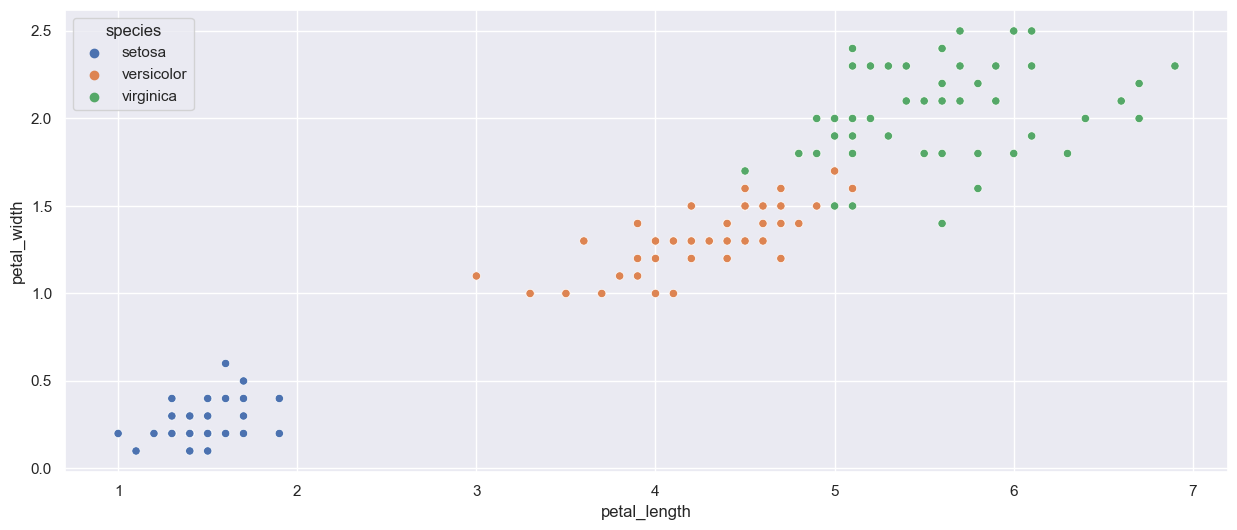

In [45]:
# Visualizando o gráfico e dando um spoiler do grupos bem definidos...
sns.set(rc = {'figure.figsize':(15, 6)})
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species');

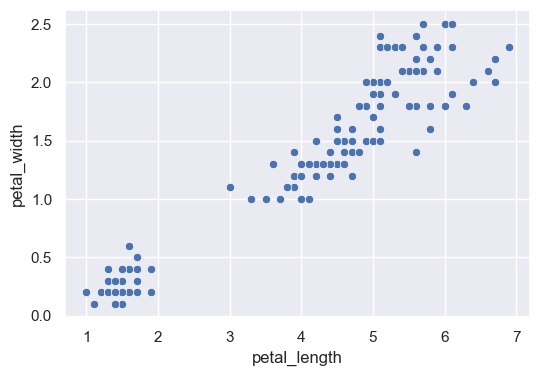

In [47]:
# Gráfico sem mostrar os grupos
sns.set(rc = {'figure.figsize':(6, 4)})
sns.scatterplot(data=df, x='petal_length', y='petal_width');

Text(0.5, 1.0, 'Conhecendo os grupos')

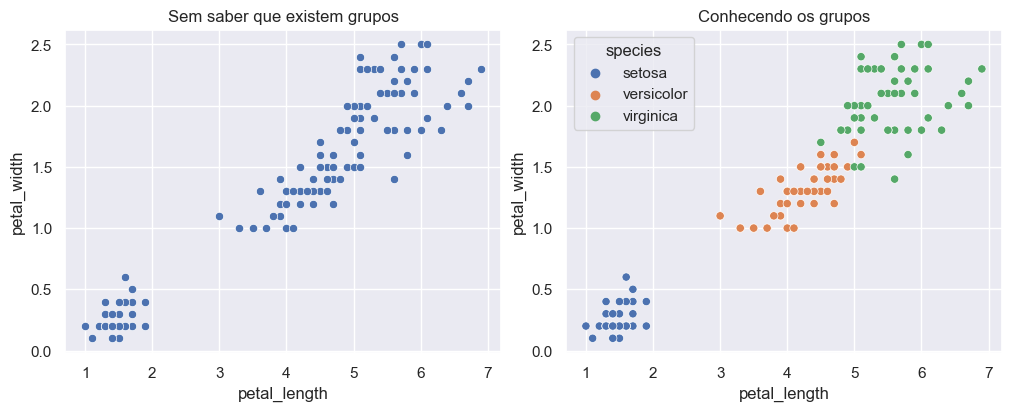

In [48]:
# Mostrar os dois gráficos uma ao lado do outro, um sem o hue para mostrar que não teria como adivinhar os grupos
fig, g = plt.subplots(ncols=2, figsize=(10, 4), layout='constrained')

# Gráfico da esquerda
sns.scatterplot(data=df, x='petal_length', y='petal_width', ax=g[0])
g[0].set_title('Sem saber que existem grupos')
# Gráfico da direita
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species', ax=g[1])
g[1].set_title('Conhecendo os grupos')

In [49]:
# Definimos uma matriz "X" com as caracteristicas que representam uma flor Iris.
X = df[df.columns.difference(['species'])].values

print("Exemplo de caracteristicas da flor: {}".format(X[0]))
#Exemplo de caracteristicas da flor: [1.4 0.2 5.1 3.5]

Exemplo de caracteristicas da flor: [1.4 0.2 5.1 3.5]


In [50]:
X.shape

(150, 4)

In [51]:
X

array([[1.4, 0.2, 5.1, 3.5],
       [1.4, 0.2, 4.9, 3. ],
       [1.3, 0.2, 4.7, 3.2],
       [1.5, 0.2, 4.6, 3.1],
       [1.4, 0.2, 5. , 3.6],
       [1.7, 0.4, 5.4, 3.9],
       [1.4, 0.3, 4.6, 3.4],
       [1.5, 0.2, 5. , 3.4],
       [1.4, 0.2, 4.4, 2.9],
       [1.5, 0.1, 4.9, 3.1],
       [1.5, 0.2, 5.4, 3.7],
       [1.6, 0.2, 4.8, 3.4],
       [1.4, 0.1, 4.8, 3. ],
       [1.1, 0.1, 4.3, 3. ],
       [1.2, 0.2, 5.8, 4. ],
       [1.5, 0.4, 5.7, 4.4],
       [1.3, 0.4, 5.4, 3.9],
       [1.4, 0.3, 5.1, 3.5],
       [1.7, 0.3, 5.7, 3.8],
       [1.5, 0.3, 5.1, 3.8],
       [1.7, 0.2, 5.4, 3.4],
       [1.5, 0.4, 5.1, 3.7],
       [1. , 0.2, 4.6, 3.6],
       [1.7, 0.5, 5.1, 3.3],
       [1.9, 0.2, 4.8, 3.4],
       [1.6, 0.2, 5. , 3. ],
       [1.6, 0.4, 5. , 3.4],
       [1.5, 0.2, 5.2, 3.5],
       [1.4, 0.2, 5.2, 3.4],
       [1.6, 0.2, 4.7, 3.2],
       [1.6, 0.2, 4.8, 3.1],
       [1.5, 0.4, 5.4, 3.4],
       [1.5, 0.1, 5.2, 4.1],
       [1.4, 0.2, 5.5, 4.2],
       [1.5, 0

In [52]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
# Aqui que é feito o treinamento ( fit recebe o 'X' que são os valores em análise para se chegar nos 3 grupos)
kmeans.fit(X)


C:\Users\fallg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [53]:
# Aqui temos as 3 linhas de registros para as 4 colunas que foram indicadas
kmeans.cluster_centers_

array([[5.74210526, 2.07105263, 6.85      , 3.07368421],
       [1.462     , 0.246     , 5.006     , 3.428     ],
       [4.39354839, 1.43387097, 5.9016129 , 2.7483871 ]])

In [54]:
# Aqui fazemos a inclusão da Coluna Cluster os labels criados

df['cluster'] = kmeans.labels_
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [55]:
df.groupby('cluster').count()

,sepal_length,sepal_width,petal_length,petal_width,species
cluster,,,,,
0,38,38,38,38,38
1,50,50,50,50,50
2,62,62,62,62,62


In [56]:
# Buscar valores de min e max para os grupos
df.groupby('cluster').agg(['min', 'max']).T

cluster                    0       1           2
sepal_length min         6.1     4.3         4.9
             max         7.9     5.8         7.0
sepal_width  min         2.5     2.3         2.0
             max         3.8     4.4         3.4
petal_length min         4.9     1.0         3.0
             max         6.9     1.9         5.1
petal_width  min         1.4     0.1         1.0
             max         2.5     0.6         2.4
species      min  versicolor  setosa  versicolor
             max   virginica  setosa   virginica

In [57]:
# Criando um dataframe com os centroides
df_centroide = pd.DataFrame(data = kmeans.cluster_centers_
                            ,columns =['sepal_length','sepal_width','petal_length','petal_width'])

In [58]:
df_centroide.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.742105,2.071053,6.850000,3.073684
1,1.462000,0.246000,5.006000,3.428000
2,4.393548,1.433871,5.901613,2.748387


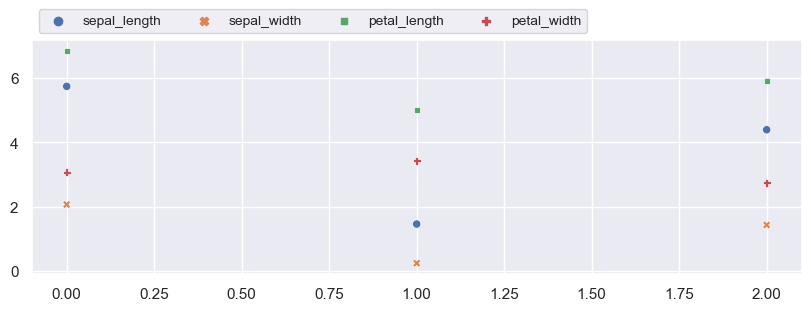

In [95]:
fig, g = plt.subplots(figsize=(8, 3), layout='constrained')
sns.scatterplot(data=df_centroide)
"""
plt.legend(loc=4
           ,ncols=4 # quantas colunas
           ,frameon=False # false retira o fundo da legenda
           ,framealpha=.2 # semi transaperencia [0-1] da transparencia ao opaco
           ,borderpad=1
          )
"""
g.legend(ncols=4, bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

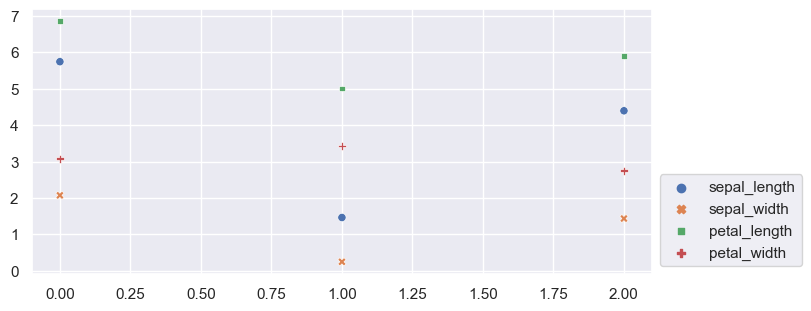

In [96]:
fig, g = plt.subplots(figsize=(8, 3), layout='constrained')
sns.scatterplot(data=df_centroide)
g.legend(loc="lower left",bbox_to_anchor=(1, 0))

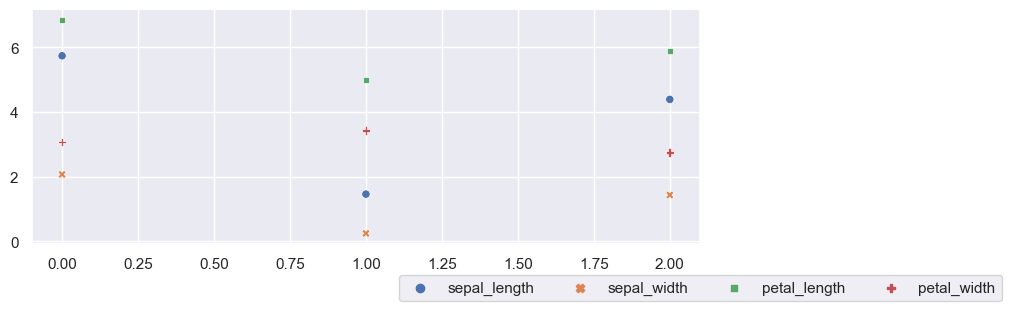

In [124]:
fig, g = plt.subplots(figsize=(10, 3), layout='constrained')
sns.scatterplot(data=df_centroide)
g.legend(loc=9,bbox_to_anchor=(1, 0), ncols=4
         #,borderpad=.2, labelspacing=.1, handlelength=1
         ,borderaxespad=2)

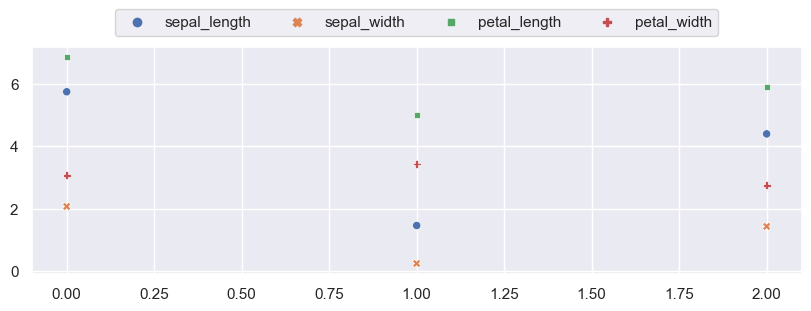

In [162]:
fig, g = plt.subplots(figsize=(8, 3), layout='constrained')
sns.scatterplot(data=df_centroide)
g.legend(loc=9,bbox_to_anchor=(.5, 1.3) #// 1 = desloca em X (0.5 fica no meio) // 2 = desloca em Y (0.5 fica no meio)
         ,ncols=4
         #,borderpad=0.1, labelspacing=0.1, handlelength=0.1
         ,borderaxespad=2 # Este afasta a legenda do gráfico
        )

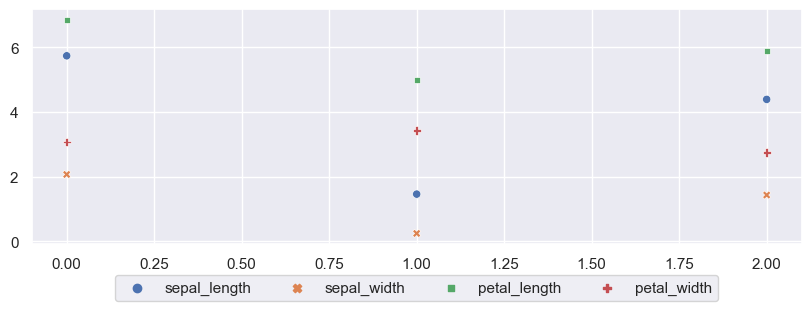

In [165]:
fig, g = plt.subplots(figsize=(8, 3), layout='constrained')
sns.scatterplot(data=df_centroide)
g.legend(loc=9,bbox_to_anchor=(.5, 0) #// 1 = desloca em X (0.5 fica no meio) // 2 = desloca em Y (0.5 fica no meio)
         ,ncols=4
         #,borderpad=0.1, labelspacing=0.1, handlelength=0.1
         ,borderaxespad=2 # Este afasta a legenda do gráfico
        )

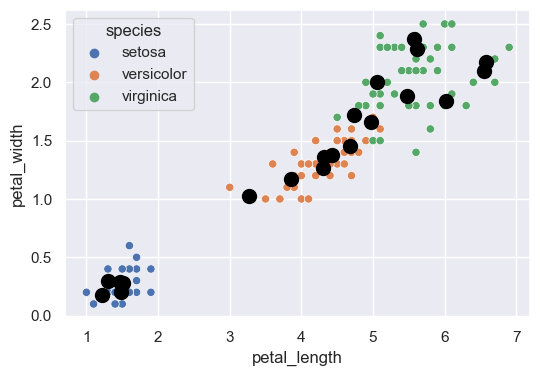

In [159]:
# Gráfico com os pontos e com o centróide dos grupos

import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species');
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black');


# Método do cotovelo

Método do Cotovelo, basicamente treinamos o k-Means com vários k e olhamos o valor da inertia obtida em cada um dos treinos. No exemplo a seguir vou treinar o k-Means com valores de k entre 1 e 20:

In [99]:
distancias = {}

for k in range(1, 21):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(X)
  distancias[k] = kmeans.inertia_

C:\Users\fallg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\fallg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\fallg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\fallg\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

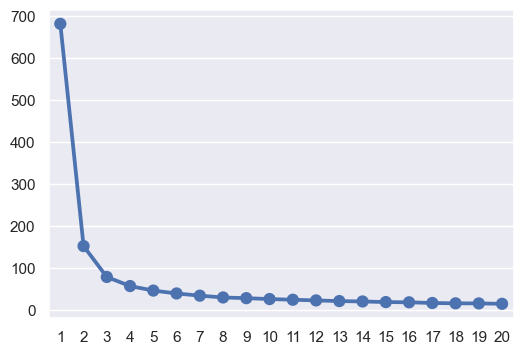

In [100]:
sns.pointplot(x = list(distancias.keys()), y = list(distancias.values()))
plt.show();

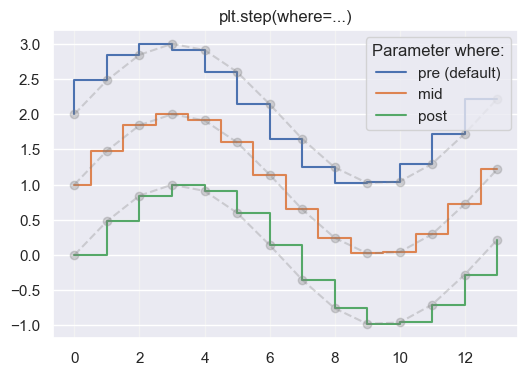

In [131]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(14)
y = np.sin(x / 2)

plt.step(x, y + 2, label='pre (default)')
plt.plot(x, y + 2, 'o--', color='grey', alpha=0.3)

plt.step(x, y + 1, where='mid', label='mid')
plt.plot(x, y + 1, 'o--', color='grey', alpha=0.3)

plt.step(x, y, where='post', label='post')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter where:')
plt.title('plt.step(where=...)')
plt.show()